##### <span style="color: #FF0000;">Course Progress Overview</span>

Throughout this course, we've explored and implemented various machine learning models, focusing on different aspects of data analysis and prediction. Our journey has covered fundamental concepts through to advanced modeling approaches.

##### <span style="color: #1E90FF;">Models Covered</span>

1. **Regression Models**:
   - Linear Regression
   - Polynomial Regression
   - Ridge/Lasso Regression

2. **Classification Models**:
   - Logistic Regression
   - Support Vector Machines
   - Decision Trees

3. **Advanced Techniques**:
   - Clustering Algorithms
   - Ensemble Methods
   - Neural Networks

##### <span style="color: #FF0000;">Implementation Progress</span>

1. **Data Analysis**:
   - Exploratory Data Analysis
   - Feature Distribution Analysis
   - Correlation Studies

2. **Model Implementation**:
   - Basic Model Training
   - Hyperparameter Tuning
   - Performance Evaluation

3. **Visualization**:
   - Distribution Plots
   - Correlation Matrices
   - Performance Metrics

##### <span style="color: #1E90FF;">Advanced Implementation Plan</span>

Our selected approach (Data Enhancement → Feature Engineering → Clustering → Stacking Models) will be implemented in subsequent tasks:

1. **Data Enhancement**:
   - Further feature creation
   - External data integration
   - Advanced cleaning techniques

2. **Feature Engineering**:
   - Feature selection
   - Dimensionality reduction
   - Feature scaling and transformation

3. **Clustering**:
   - Market segmentation
   - Property grouping
   - Cluster-based analysis

4. **Stacking Models**:
   - Base model selection
   - Meta-model implementation
   - Ensemble optimization

In [1]:
%pip install pandas numpy matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import warnings
import numpy as np
from IPython.display import display, HTML

# Suppress Intel MKL warnings
warnings.filterwarnings('ignore', category=UserWarning, module='numpy')

# Read the cleaned and standardized dataset
df = pd.read_csv('/Users/ryangichuru/Documents/SSD-K/Uni/2nd year/Intro to AI/Main Assignment/assignment-1-ryantigi254/data/further_cleaned_standardized_housing_dataset.csv')

# Create styled DataFrames for better visualization
info_dict = {
    'Column': df.columns.tolist(),
    'Non-Null Count': [df[col].count() for col in df.columns],
    'Dtype': [df[col].dtype for col in df.columns]
}
info_df = pd.DataFrame(info_dict)
info_df.index = range(1, len(info_df) + 1)

print("\nDataset Info:")
display(HTML(info_df.to_html(classes='table table-striped')))

print("\nFirst few rows:")
display(HTML(df.head().to_html(classes='table table-striped')))

print("\nBasic Statistics:")
display(HTML(df.describe().to_html(classes='table table-striped')))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Dataset Info:


,Column,Non-Null Count,Dtype
1,Address,30683,object
2,City,30683,object
3,Last Sold For ($),13956,float64
4,Last Sold Year,13956,float64
5,Latitude (degrees),30683,float64
6,Longitude (degrees),30683,float64
7,Lot Size (sqft),27587,float64
8,Price ($),30445,float64
9,Price per Square Foot ($/sqft),30228,float64
10,State,30683,object



First few rows:


,Address,City,Last Sold For ($),Last Sold Year,Latitude (degrees),Longitude (degrees),Lot Size (sqft),Price ($),Price per Square Foot ($/sqft),State,Year Built,Zipcode,airconditioning,Area (sqft),basement,bathrooms,bedrooms,furnishingstatus,guestroom,hotwaterheating,mainroad,parking,prefarea,price,stories
0,"710 E 42nd St N Tulsa, OK 74106",Tulsa,35000.0,2014.0,36.214306,-95.984000,7492.0,39900.0,5.0,OK,1952.0,74106.0,yes,7420.0,no,2,4,2,no,no,yes,2,yes,13300000,3
1,"2030 SW Vista Ave Portland, OR 97201",Portland,NaN,NaN,45.512108,-122.697190,13939.2,2300000.0,257.0,OR,1890.0,97201.0,yes,8960.0,no,4,4,2,no,no,yes,3,no,12250000,4
2,"8720 Memorial Dr Houston, TX 77024",Houston,NaN,NaN,29.773930,-95.460495,30056.4,7990000.0,888.0,TX,2019.0,77024.0,yes,8960.0,no,4,4,2,no,no,yes,3,no,12250000,4
3,"2436 Mandolin Ct Chesapeake, VA 23321",Chesapeake,NaN,NaN,36.800583,-76.422020,NaN,445700.0,45.0,VA,2019.0,23321.0,no,9960.0,yes,2,3,1,no,no,yes,2,yes,12250000,2
4,"710 E 42nd St N Tulsa, OK 74106",Tulsa,35000.0,2014.0,36.214306,-95.984000,7492.0,39900.0,5.0,OK,1952.0,74106.0,yes,7500.0,yes,2,4,2,no,no,yes,3,yes,12215000,2



Basic Statistics:


,Last Sold For ($),Last Sold Year,Latitude (degrees),Longitude (degrees),Lot Size (sqft),Price ($),Price per Square Foot ($/sqft),Year Built,Zipcode,Area (sqft),bathrooms,bedrooms,furnishingstatus,parking,price,stories
count,1.395600e+04,13956.000000,30683.000000,30683.000000,2.758700e+04,3.044500e+04,30228.000000,28262.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,3.068300e+04,30683.000000
mean,3.518377e+05,2010.564058,36.138154,-96.662039,2.463154e+05,4.667707e+05,189.372469,1971.602434,63328.424567,2459.391780,1.492129,3.164065,0.787993,0.204315,3.589621e+06,1.853567
std,2.057483e+06,6.969698,5.498224,14.361123,2.808261e+06,4.981711e+05,179.140085,34.260444,25027.422602,695.020486,0.606035,0.639968,0.785101,0.507301,1.084385e+06,0.546068
min,1.000000e+00,1993.000000,25.551378,-149.953160,1.000000e+03,1.000000e+00,0.000000,1800.000000,2108.000000,1650.000000,1.000000,1.000000,0.000000,0.000000,1.750000e+06,1.000000
25%,1.573750e+05,2005.000000,32.628170,-106.671750,6.000000e+03,2.499000e+05,111.000000,1951.000000,40223.000000,2000.000000,1.000000,3.000000,0.000000,0.000000,3.080000e+06,2.000000
50%,2.490000e+05,2013.000000,35.456730,-96.061610,8.276000e+03,3.499000e+05,148.000000,1975.000000,75206.000000,2160.000000,1.000000,3.000000,1.000000,0.000000,3.500000e+06,2.000000
75%,3.800000e+05,2017.000000,39.860400,-84.397732,1.263240e+04,5.150000e+05,208.000000,2001.000000,85015.000000,2800.000000,2.000000,3.000000,1.000000,0.000000,4.200000e+06,2.000000
max,1.200000e+08,2019.000000,61.418160,-70.997740,4.295016e+07,1.980000e+07,6134.000000,2019.000000,99577.000000,12944.000000,4.000000,6.000000,2.000000,3.000000,1.330000e+07,4.000000


##### <span style="color: #FF0000;">Data Preparation Overview</span>

Throughout our weekly course tasks, we implemented comprehensive data cleaning and enhancement procedures. This work is documented in our data preparation files and weekly task submissions. The process focused on improving data quality and feature richness for subsequent analysis.

##### <span style="color: #1E90FF;">Key Accomplishments</span>

1. **Data Integration**:
   - Merged multiple housing datasets
   - Enhanced feature set with additional characteristics
   - Standardized data formats across sources

2. **Data Cleaning**:
   - Handled missing values using statistical methods
   - Standardized numeric formats
   - Encoded categorical variables
   - Removed duplicates and outliers

3. **Quality Control**:
   - Implemented validation checks
   - Created visualization reports
   - Tracked unmatched properties
   - Verified data integrity post-merging

##### <span style="color: #FF0000;">Documentation Reference</span>

For detailed documentation of the process, refer to:
- `data preparation.ipynb`
- `Data preparation.md`
- Weekly Tasks directory

##### <span style="color: #1E90FF;">Data Source Enhancement</span>

The original dataset provided in class was enhanced with additional data from [Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset) to increase the number of features available for analysis. This enhancement improved our ability to identify meaningful patterns and relationships in the data.

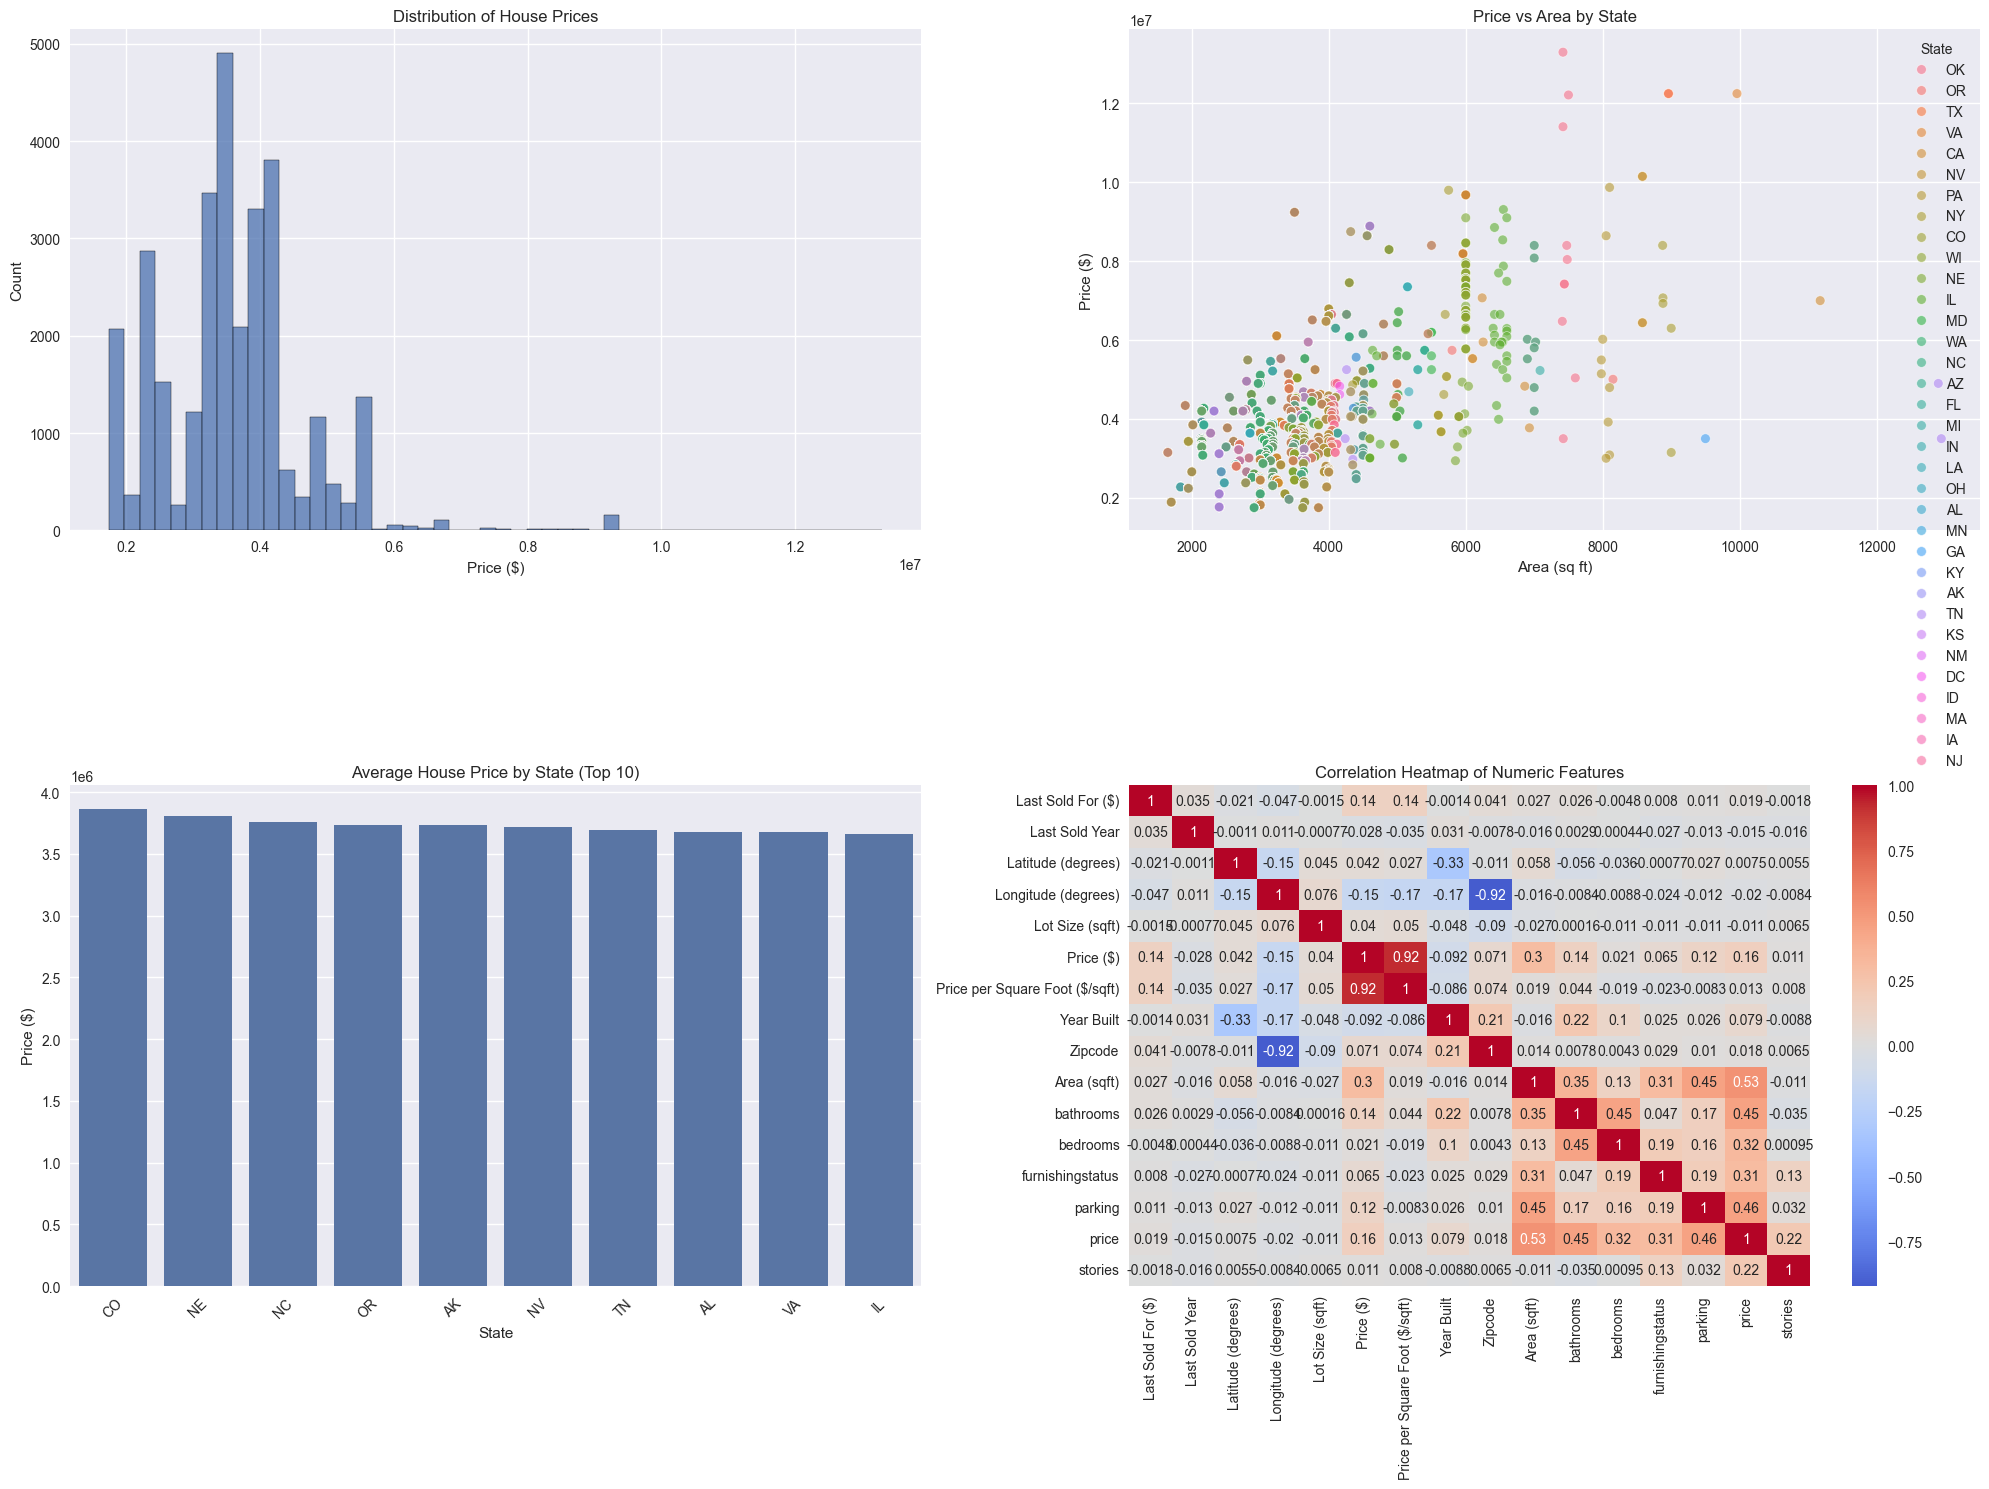

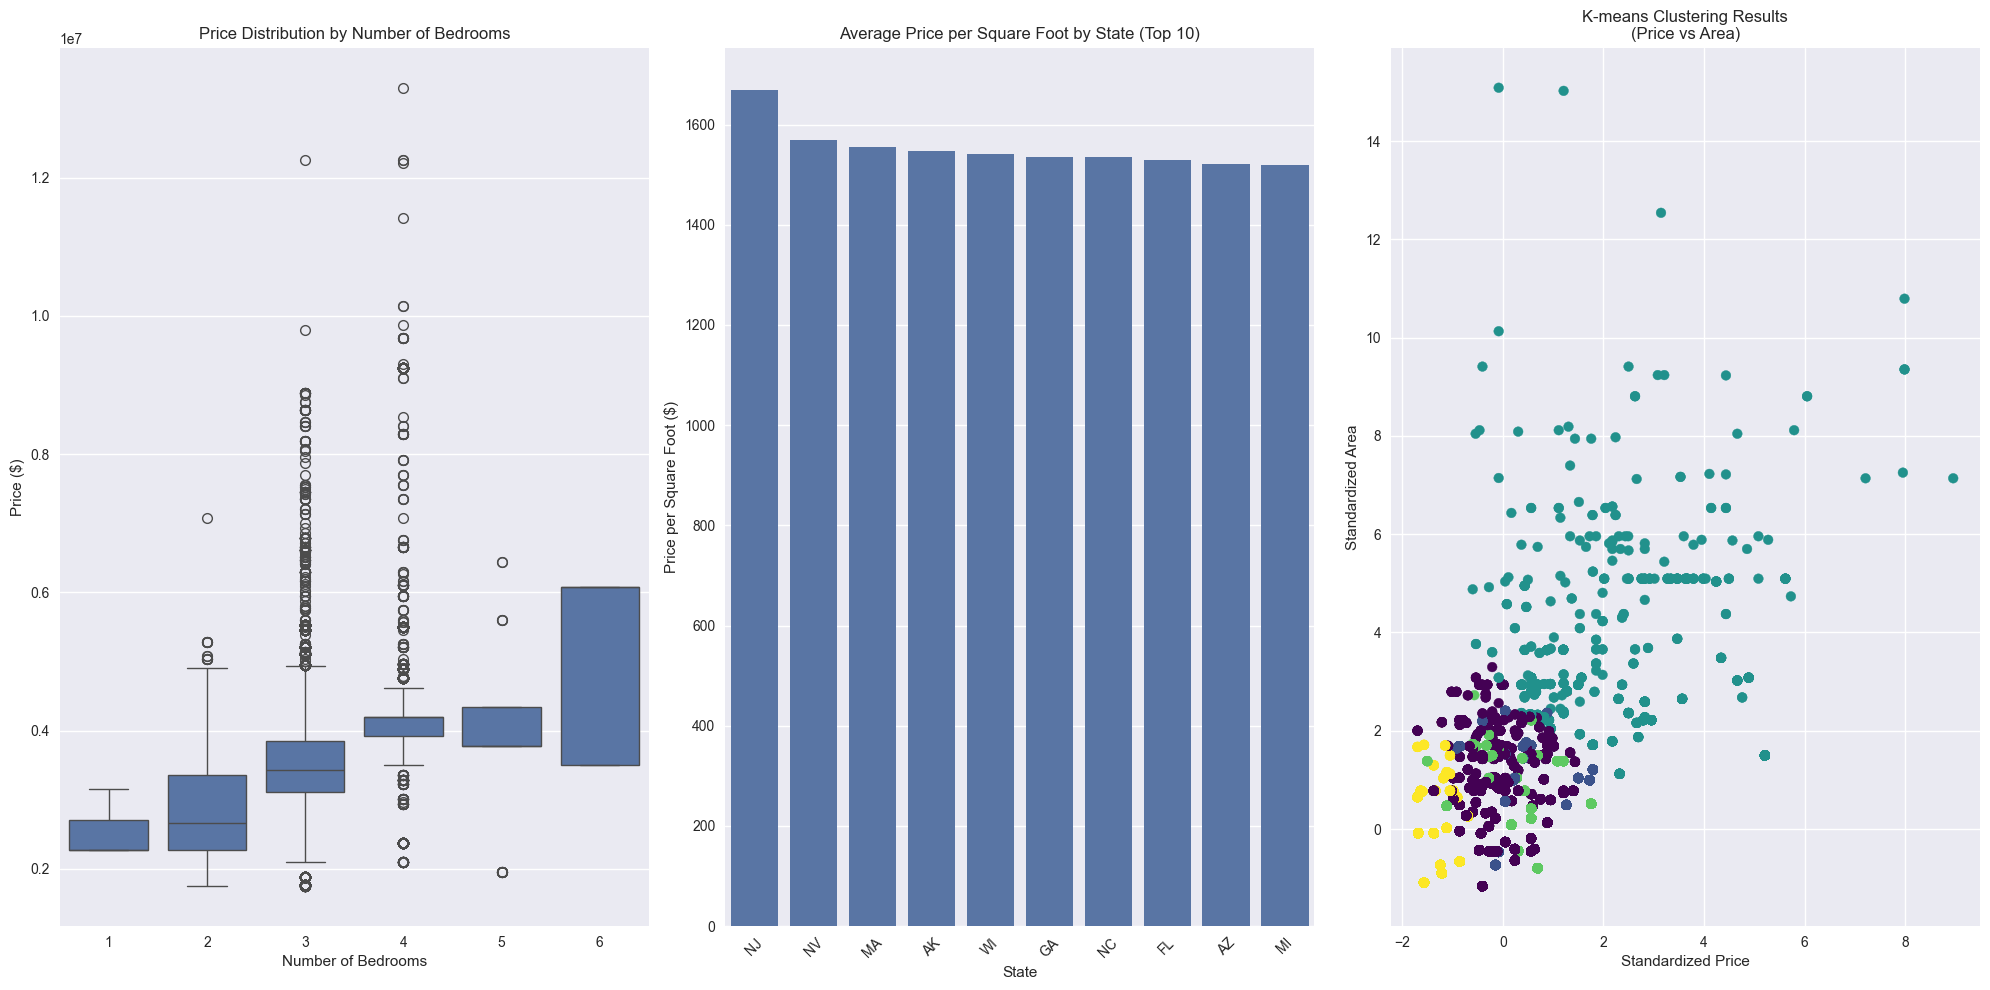

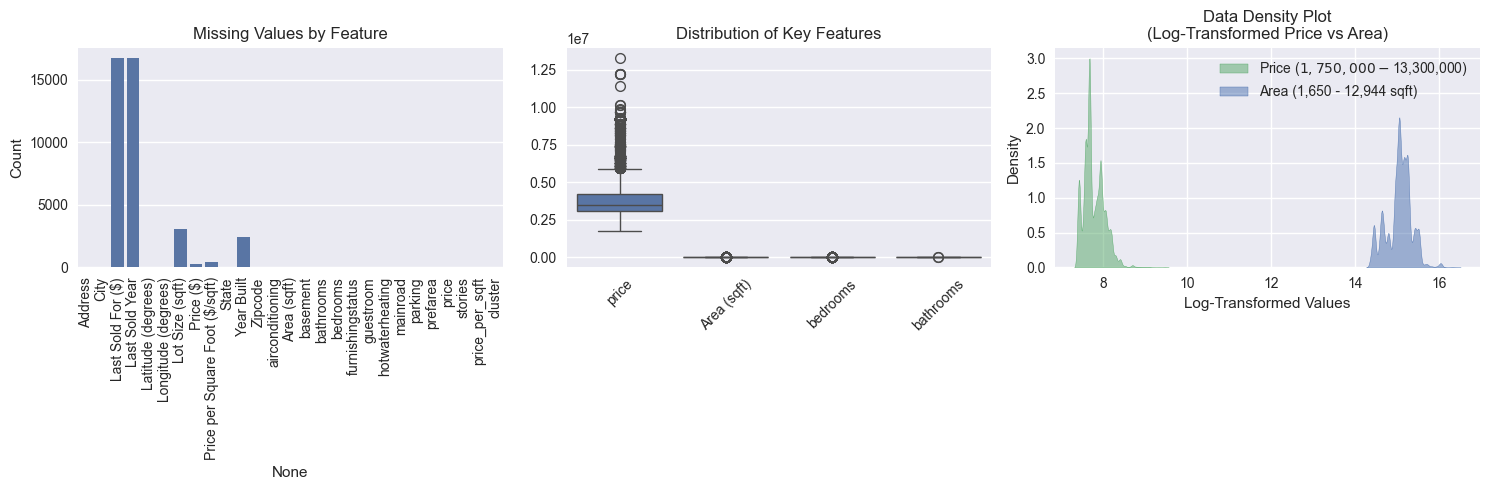

In [3]:
# Prior to this task, I had already completed the data preparation task. 
# This are visualisations of the final data we had.
 
# Import visualization libraries if not already imported
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style for better visualization
plt.style.use('seaborn-v0_8')  # Updated to use valid style name

# First set of plots
fig = plt.figure(figsize=(20,15))

# 1. Price Distribution
plt.subplot(2,2,1)
sns.histplot(data=df, x='price', bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')

# 2. Price vs Area with State coloring
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='Area (sqft)', y='price', hue='State', alpha=0.6)
plt.title('Price vs Area by State')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')

# 3. Average Price by State
plt.subplot(2,2,3)
state_prices = df.groupby('State')['price'].mean().sort_values(ascending=False)
sns.barplot(x=state_prices.index[:10], y=state_prices.values[:10])
plt.title('Average House Price by State (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Price ($)')

# 4. Correlation Heatmap
plt.subplot(2,2,4)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')

plt.tight_layout()
plt.show()

# Second set of plots
fig = plt.figure(figsize=(20,10))

# 5. Box plot of price by bedrooms
plt.subplot(1,3,1)
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')

# 6. Price per square foot by state
plt.subplot(1,3,2)
df['price_per_sqft'] = df['price'] / df['Area (sqft)']
state_price_sqft = df.groupby('State')['price_per_sqft'].mean().sort_values(ascending=False)
sns.barplot(x=state_price_sqft.index[:10], y=state_price_sqft.values[:10])
plt.title('Average Price per Square Foot by State (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Price per Square Foot ($)')

# 7. Clustering visualization (from Task 1)
plt.subplot(1,3,3)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
cluster_features = ['price', 'Area (sqft)', 'bedrooms', 'bathrooms']
X = df[cluster_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters using first two features
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering Results\n(Price vs Area)')
plt.xlabel('Standardized Price')
plt.ylabel('Standardized Area')

plt.tight_layout()
plt.show()

# Third set of plots - Data Quality Assessment
fig = plt.figure(figsize=(15,5))

# 8. Missing Values
plt.subplot(1,3,1)
missing_values = df.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values by Feature')
plt.xticks(rotation=90)
plt.ylabel('Count')

# 9. Feature Distribution
plt.subplot(1,3,2)
sns.boxplot(data=df[cluster_features])
plt.title('Distribution of Key Features')
plt.xticks(rotation=45)

# 10. Data Density
plt.subplot(1,3,3)
# Log transform the data for better visualization
log_price = np.log1p(df['price'])
log_area = np.log1p(df['Area (sqft)'])

# Create KDE plot with adjusted parameters
sns.kdeplot(data={'Log Price': log_price, 'Log Area': log_area}, 
            common_norm=False,
            fill=True,
            alpha=0.5)

plt.title('Data Density Plot\n(Log-Transformed Price vs Area)')
plt.xlabel('Log-Transformed Values')
plt.ylabel('Density')

# Add legend with original scale values
plt.legend(labels=[
    f'Price (${df.price.min():,.0f} - ${df.price.max():,.0f})',
    f'Area ({df["Area (sqft)"].min():,.0f} - {df["Area (sqft)"].max():,.0f} sqft)'
])

plt.tight_layout()
plt.show()


##### <span style="color: #FF0000;">Strategy Alignment with Assignment Requirements</span>

Our implementation strategy directly maps to the core assignment requirements while extending beyond basic implementation:

1. **Required Model Coverage**:
   - Regression: Implemented through base models in stacking strategy
   - Clustering: Dedicated phase for market segmentation
   - Additional Models: Incorporated via model stacking approach

2. **Model Integration Strategy**:
   - Base Layer: Required regression models (Linear, Polynomial, etc.)
   - Segmentation Layer: K-means and hierarchical clustering
   - Meta Layer: Ensemble combining base predictions

3. **Enhanced Implementation**:
   Our approach expands on requirements by:
   - Using clustering insights to inform regression models
   - Leveraging feature engineering to improve all models
   - Implementing stacking to optimize overall performance

4. **Assignment Objectives Mapping**:
   - Data Analysis ➔ Data Enhancement Phase
   - Feature Selection ➔ Feature Engineering Focus
   - Model Building ➔ Clustering + Stacking Strategy
   - Performance Optimization ➔ Meta-model Architecture

This strategy ensures we meet all assignment requirements while implementing a more sophisticated solution architecture for improved performance.

##### <span style="color: #1E90FF;">Key Models in Strategy</span>

**Base Models (Regression)**:
- Linear Regression
- Polynomial Regression
- Ridge/Lasso
- Gradient Boosting

**Clustering Models**:
- K-means
- Hierarchical Clustering
- DBSCAN

**Meta Models**:
- Random Forest
- XGBoost
- LightGBM